In [1]:
from IPython.display import Image

## GRASP vs PAM

- Load the original coordinates set of 10000 2D vectors (look MP last commit).
- Extract 32 vectors with GRASP
- Transform distances with gaussian kernel before clustering and pass 1/D. to clustering
- Cluster with K=32 with PAM

In [2]:
import numpy as np
import scipy as sp
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN, MeanShift,AffinityPropagation, SpectralClustering
from math import exp, sqrt
from scipy.spatial.distance import cdist, pdist, squareform

%matplotlib inline
%load_ext autoreload

In [3]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import myvalidation
%autoreload 2

**these were the GRASP settings**

In [4]:
!cat input.gra

candidates.txt     /* name of the file of the candidate vectors */   
   1               /* N_cycles; number of cycles of GRASP */
   10000            /* n; number of the vectors of the basin; this value must correspond to the size of the array stored in the file of the candidates */
   2               /* m; dimensionality of the vectors; this value must correspond to the dimension of the array stored in the file of the candidates */
   32              /* n_tr_sel; number of the vectors selected; if i_cum=0 n_tr_sel=n_tr_tot, if i_com=1 n_tr_sel < i_n_tr_tot */
   32              /* n_tr_tot; total number of vectors included in the solution */ 
   6               /* M; parameter of the fitness function */
   5               /* i_power; in func local_search_loc, 2^i_power is the size of the first sample */
   3               /* c_max; in func local_search_loc, max number of cycles of local_loc */
   9               /* i_power; in func local_search_scrambled, 2^i_power is the size of the

**these were the GRASP input and solution**

In [5]:
input_data = np.loadtxt("candidates_2columns.dat")
input_data.shape

(10000, 2)

In [6]:
grasp_out = np.loadtxt("solution_v_32.txt")
grasp_index = open("solution_i_32_32.txt", "r")
grasp_sol = np.array([int(i) for i in grasp_index.readlines()[3:]])
grasp_out.shape, grasp_sol.shape

((32, 2), (32,))

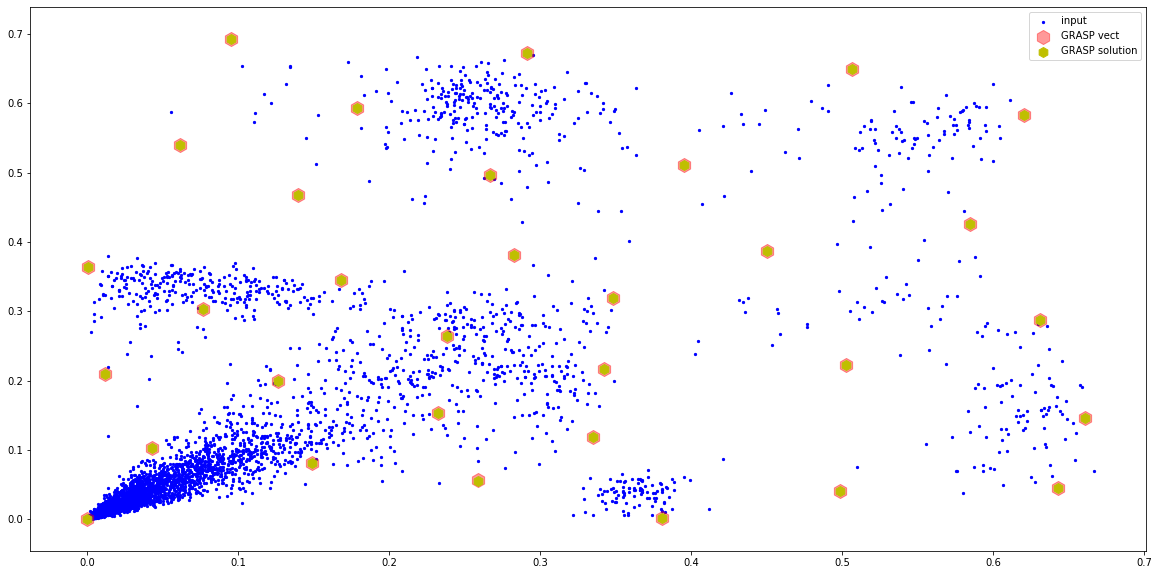

In [7]:
plt.figure(figsize=(20,10))
x = input_data[:,0]
y = input_data[:,1]
plt.scatter(x, y, marker="o", s=5, c='b', label="input")
plt.scatter(grasp_out[:,0], grasp_out[:,1], label="GRASP vect", \
             marker='h',c='r', s=200,alpha=0.4,)
plt.scatter(x[grasp_sol], y[grasp_sol], label="GRASP solution", \
             marker='h',c='y', s=100)
plt.legend()

In [8]:
metric = "euclidean"

In [9]:
def assign(data, centers, metric):
    clusters = np.empty(data.shape[0], dtype='int')
    dist = cdist(data, data[centers], metric=metric)
    for pj in range(data.shape[0]):
        nearest = np.argmin(dist[pj])
        clusters[pj] = nearest
    return clusters

**Clustering**

In [10]:
K = 32
metric = "precomputed"
sigma = 0.1

In [11]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(input_data,metric="euclidean"))
Dt = np.exp(-(D*D)/(2.*sigma*sigma))
Dinv = 1./Dt

In [12]:
my_estimator = myclusters.PAM(K=K,metric=metric, niter=100)
cost, medoids = my_estimator.do_clustering(D=Dinv, doswap=True)
my_estimator.inertia

10140.27360387371

In [13]:
PAM_sol = my_estimator.medoids

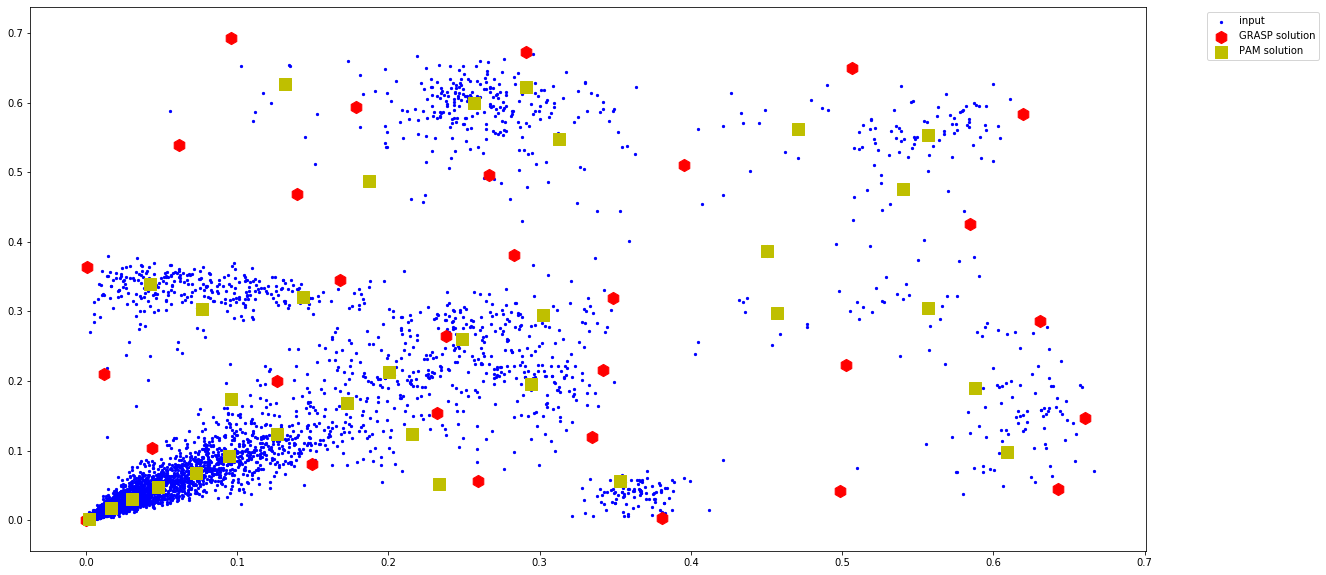

In [14]:
plt.figure(figsize=(20,10))
x = input_data[:,0]
y = input_data[:,1]
plt.scatter(x, y, marker="o", s=5, c='b', label="input")
plt.scatter(x[grasp_sol], y[grasp_sol], label="GRASP solution", \
             marker='h',c='r', s=150)
plt.scatter(x[PAM_sol], y[PAM_sol], label="PAM solution", \
             marker='s',c='y', s=150)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')